In [ ]:
!nvidia-smi

Sat Nov 16 10:46:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 43.7 MB/s eta 0:00:00


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!unzip "dataset.zip" -d "datasets"

Archive:  dataset.zip
   creating: datasets/dataset/
   creating: datasets/dataset/test/
   creating: datasets/dataset/test/Black Soil/
  inflating: datasets/dataset/test/Black Soil/10.jpg  
  inflating: datasets/dataset/test/Black Soil/25.jpg  
  inflating: datasets/dataset/test/Black Soil/26.jpg  
  inflating: datasets/dataset/test/Black Soil/32.jpg  
  inflating: datasets/dataset/test/Black Soil/38.jpg  
  inflating: datasets/dataset/test/Black Soil/9.jpg  
   creating: datasets/dataset/test/Cinder Soil/
  inflating: datasets/dataset/test/Cinder Soil/16.jpg  
  inflating: datasets/dataset/test/Cinder Soil/20.jpg  
  inflating: datasets/dataset/test/Cinder Soil/26.jpg  
  inflating: datasets/dataset/test/Cinder Soil/29.jpg  
  inflating: datasets/dataset/test/Cinder Soil/5.jpg  
   creating: datasets/dataset/test/Laterite Soil/
  inflating: datasets/dataset/test/Laterite Soil/11.jpg  
  inflating: datasets/dataset/test/Laterite Soil/27.jpg  
  inflating: datasets/dataset/test/Laterit

In [ ]:
%cd {HOME}
!yolo task=classify mode=train model=yolov8l-cls.pt data='/content/datasets/dataset' epochs=1000 imgsz=128

/content
100% 71.7M/71.7M [00:00<00:00, 159MB/s]
Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/content/datasets/dataset, epochs=1000, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [ ]:
%cd {HOME}
!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data='/content/datasets/dataset'

/content
Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 36,190,981 parameters, 0 gradients, 98.7 GFLOPs
train: /content/datasets/dataset/train... found 105 images in 5 classes ✅ 
val: /content/datasets/dataset/val... found 25 images in 5 classes ✅ 
test: /content/datasets/dataset/test... found 26 images in 5 classes ✅ 
val: Scanning /content/datasets/dataset/val... 25 images, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 2/2 [00:02<00:00,  1.03s/it]
                   all       0.88          1
Speed: 0.0ms preprocess, 76.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


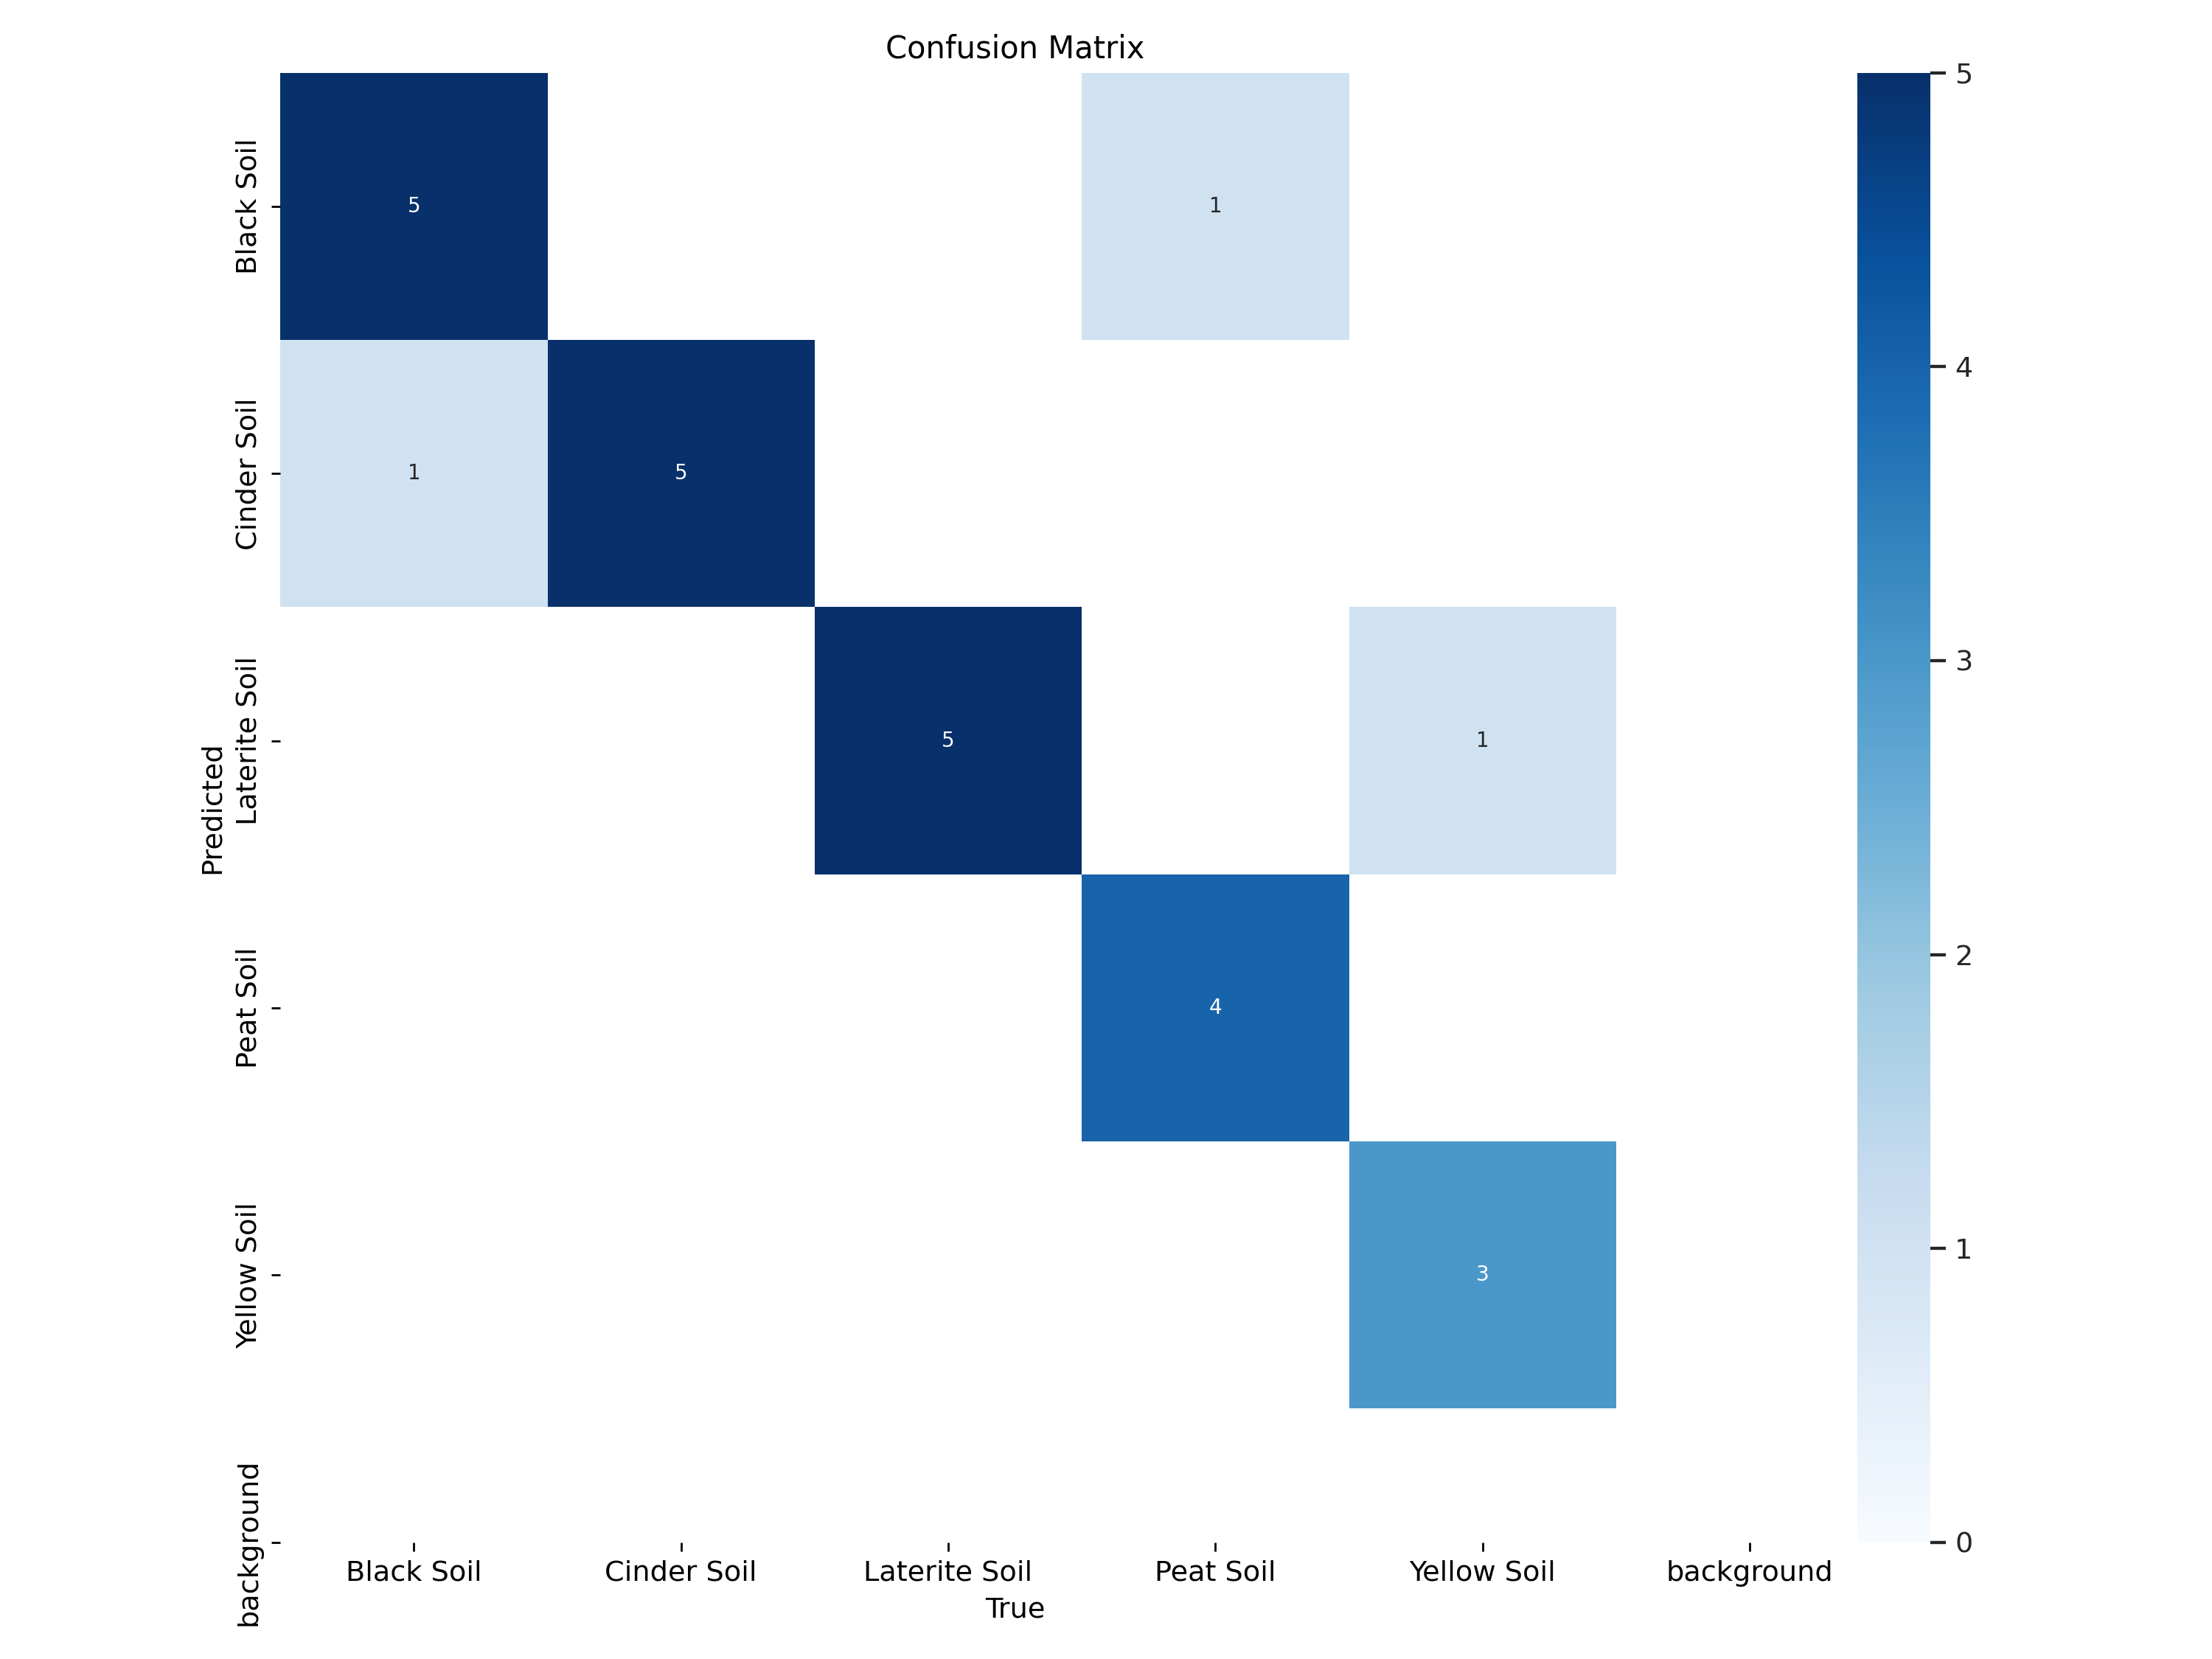

In [ ]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix.png')

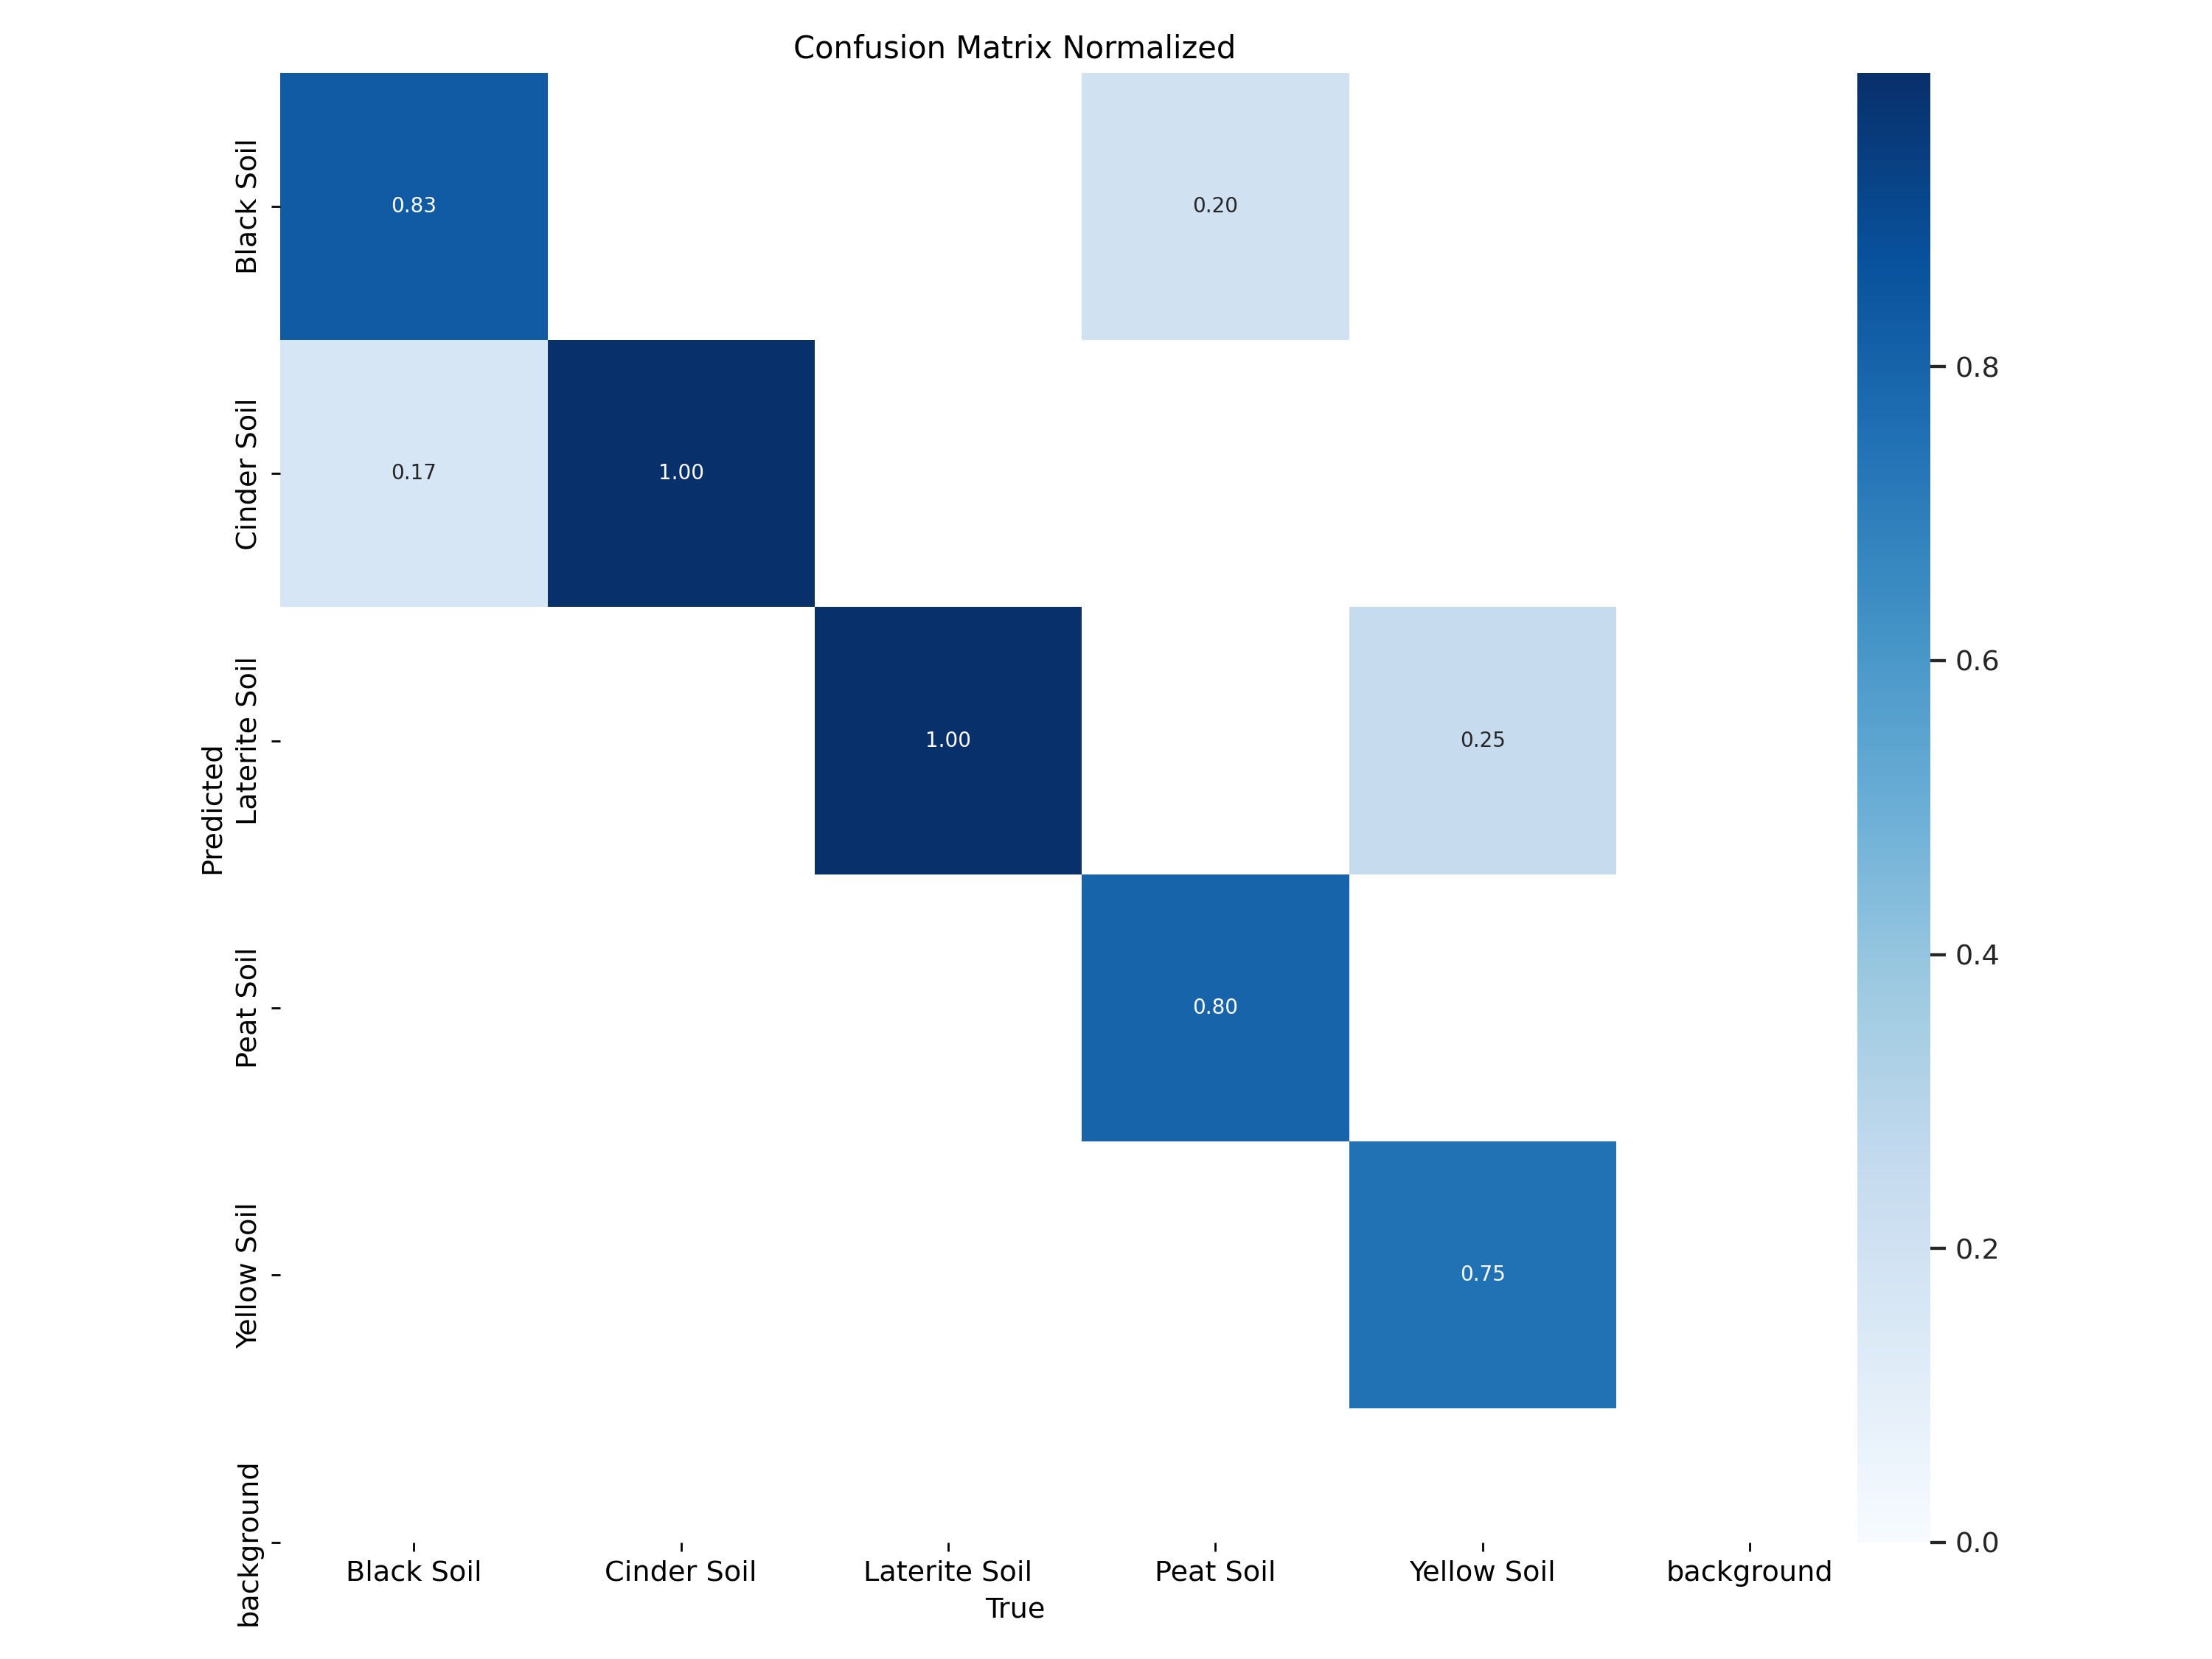

In [ ]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix_normalized.png')

In [ ]:
# Load the trained YOLOv8 model (make sure to specify the correct path)
model = YOLO('/content/runs/classify/train/weights/best.pt')  # Adjust path to your trained model

# Export the model to ONNX format
model.export(format='onnx')

# Verify the export location
!ls /content/runs/classify/train/weights/

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8l-cls summary (fused): 133 layers, 36,190,981 parameters, 0 gradients, 98.7 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 5) (69.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 248.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 153.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 241.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 187.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 197.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for u

In [ ]:
from google.colab import files
files.download('/content/runs/classify/train/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>